# HomeWork 2

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
## CSV/Data Processing ##

url = "https://raw.githubusercontent.com/Mand187/Intro-to-ML/master/Data/Housing.csv"
hf = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(hf.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Binary mapping for categorical variables
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_mapping(x):
    return x.map({'no': 0, 'yes': 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

# Split the data into training and validation sets
np.random.seed(1)
df_training, df_validation = train_test_split(hf, train_size=0.8, test_size=0.2, random_state=100)

# Normalize and Standardize the data
normalize = MinMaxScaler()
std_scale = StandardScaler()

norm_training = pd.DataFrame(normalize.fit_transform(df_training), columns=df_training.columns)
norm_validation = pd.DataFrame(normalize.transform(df_validation), columns=df_validation.columns)

std_training = pd.DataFrame(std_scale.fit_transform(df_training), columns=df_training.columns)
std_validation = pd.DataFrame(std_scale.transform(df_validation), columns=df_validation.columns)

# Non-feature scaled Outputs
y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

# Normalized Outputs
norm_y_train = norm_training.pop('price')
norm_y_valid = norm_validation.pop('price')

# Standardized Outputs
std_y_train = std_training.pop('price')
std_y_valid = std_validation.pop('price')

# Function to train the model
def train_model(inputs, x_training, x_validation, y_train, y_valid, learning_rate, iterations):
    training_inputs = x_training[inputs]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    validation_inputs = x_validation[inputs]
    x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = h_theta - y_train
        gradient = (1 / m_train) * (x_train.T.dot(error))

        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * np.sum(np.square(h_theta - y_train))
        valid_loss = 1 / (2 * m_valid) * np.sum(np.square(x_valid.dot(theta) - y_valid))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses

# Set inputs and hyperparameters
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rates = [0.1, 0.05, 0.01]
iterations = 250

In [ ]:
# Set inputs and hyperparameters
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rates = [0.1, 0.05, 0.01]
iterations = 250

# Training with normalized inputs
norm_train_losses = []
norm_valid_losses = []
std_train_losses = []
std_valid_losses = []

In [ ]:
for lr in learning_rates:
    norm_train_loss, norm_valid_loss = train_model(inputs, norm_training, norm_validation, y_train, y_valid, lr, iterations)
    norm_train_losses.append(norm_train_loss)
    norm_valid_losses.append(norm_valid_loss)

    std_train_loss, std_valid_loss = train_model(inputs, std_training, std_validation, y_train, y_valid, lr, iterations)
    std_train_losses.append(std_train_loss)
    std_valid_losses.append(std_valid_loss)


In [ ]:
# Include all inputs except for furnishingstatus
inputs = hf.columns.tolist()  # Use all columns now
inputs.remove('price')

# Training with normalized and standardized inputs with all inputs
unscaledNorm_train_losses = []
unscaledNorm_valid_losses = []
norm_train_losses = []
norm_valid_losses = []
unscaledStd_train_losses = []
unscaledStd_valid_losses = []
std_train_losses = []
std_valid_losses = []

for lr in learning_rates:
    unscaledNorm_train_loss, unscaledNorm_valid_loss = train_model(inputs, norm_training, norm_validation, y_train, y_valid, lr, iterations)
    unscaledNorm_train_losses.append(unscaledNorm_train_loss)
    unscaledNorm_valid_losses.append(unscaledNorm_valid_loss)

    norm_train_loss, norm_valid_loss = train_model(inputs, norm_training, norm_validation, norm_y_train, norm_y_valid, lr, iterations)
    norm_train_losses.append(norm_train_loss)
    norm_valid_losses.append(norm_valid_loss)

    unscaledStd_train_loss, unscaledStd_valid_loss = train_model(inputs, std_training, std_validation, y_train, y_valid, lr, iterations)
    unscaledStd_train_losses.append(unscaledStd_train_loss)
    unscaledStd_valid_losses.append(unscaledStd_valid_loss)

    std_train_loss, std_valid_loss = train_model(inputs, std_training, std_validation, norm_y_train, norm_y_valid, lr, iterations)
    std_train_losses.append(std_train_loss)
    std_valid_losses.append(std_valid_loss)

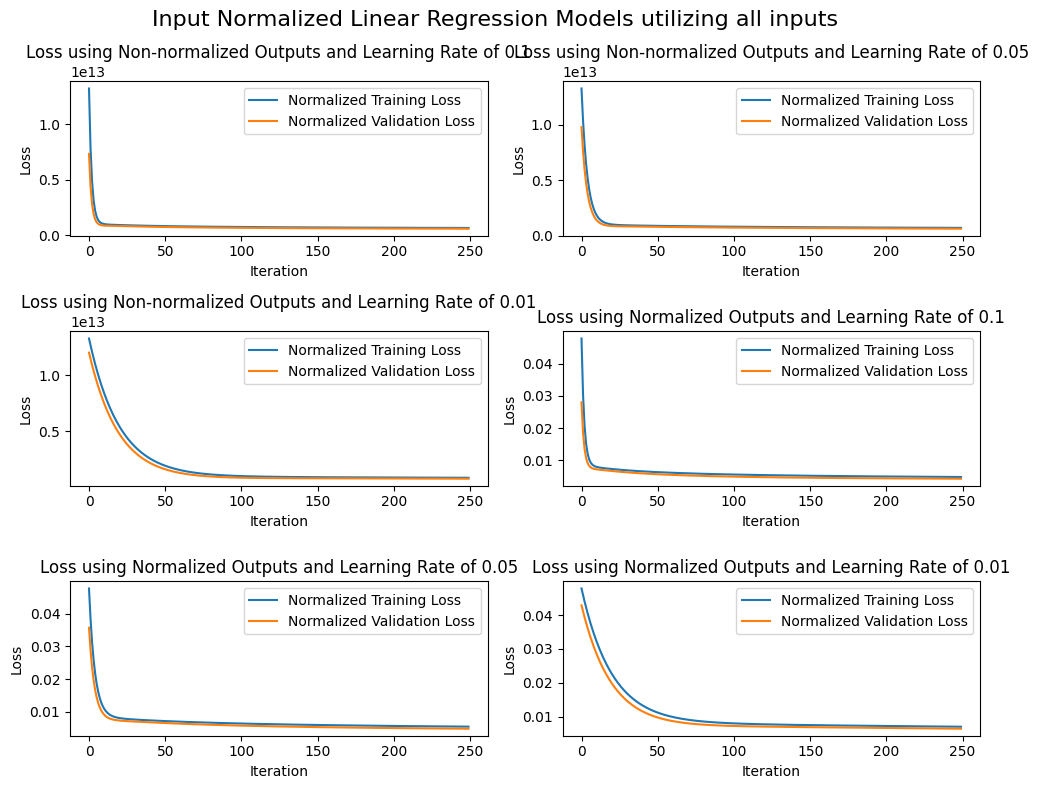

In [ ]:
# Plot the losses for unscaled normalized outputs
plt.figure(figsize=(10, 8))
plt.suptitle('Input Normalized Linear Regression Models utilizing all inputs', fontsize=16)

for i, lr in enumerate(learning_rates):
    plt.subplot(3, 2, i + 1)
    plt.plot(unscaledNorm_train_losses[i], label="Normalized Training Loss")
    plt.plot(unscaledNorm_valid_losses[i], label="Normalized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {lr}")

    plt.subplot(3, 2, i + 4)
    plt.plot(norm_train_losses[i], label="Normalized Training Loss")
    plt.plot(norm_valid_losses[i], label="Normalized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Normalized Outputs and Learning Rate of {lr}")

plt.tight_layout()
plt.show()

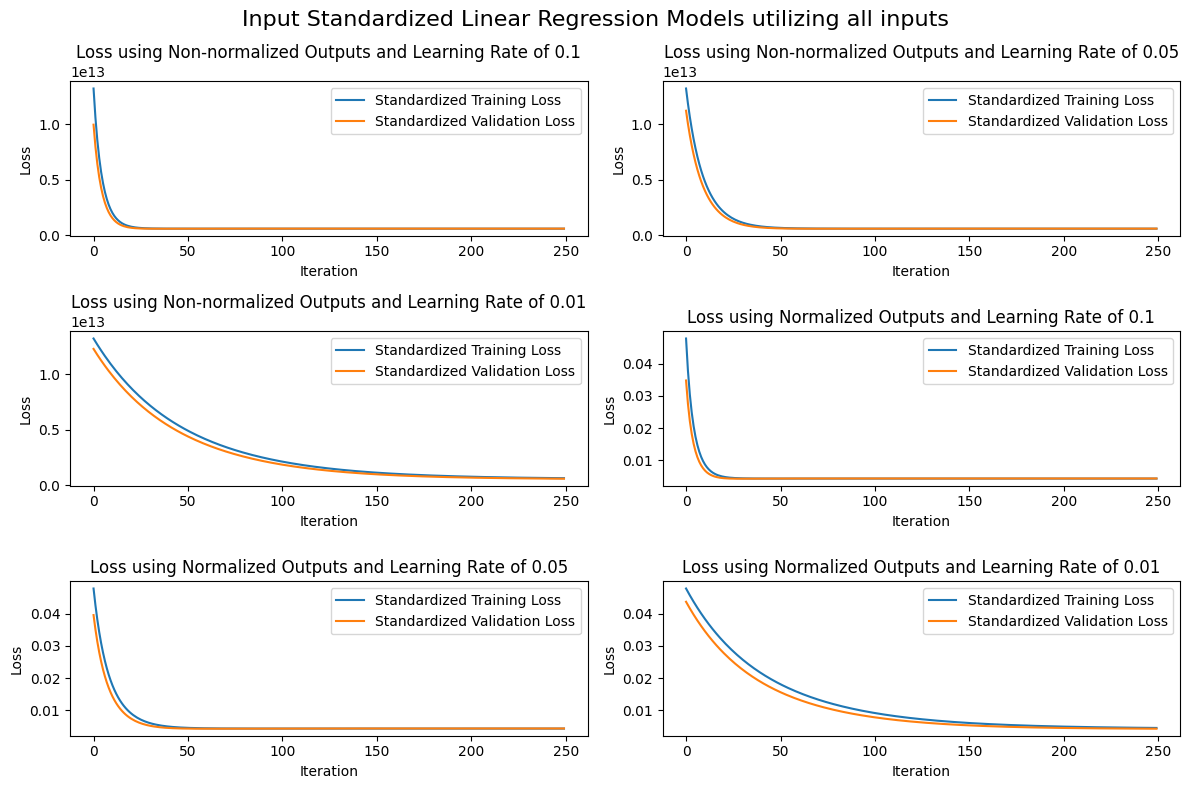

In [ ]:
# Plot the losses for unscaled standardized outputs
plt.figure(figsize=(12, 8))
plt.suptitle('Input Standardized Linear Regression Models utilizing all inputs', fontsize=16)

for i, lr in enumerate(learning_rates):
    plt.subplot(3, 2, i + 1)
    plt.plot(unscaledStd_train_losses[i], label="Standardized Training Loss")
    plt.plot(unscaledStd_valid_losses[i], label="Standardized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Non-normalized Outputs and Learning Rate of {lr}")

    plt.subplot(3, 2, i + 4)
    plt.plot(std_train_losses[i], label="Standardized Training Loss")
    plt.plot(std_valid_losses[i], label="Standardized Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Loss using Normalized Outputs and Learning Rate of {lr}")

plt.tight_layout()
plt.show()